In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
#modelli 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression, BayesianRidge, Ridge, Lasso, SGDRegressor, LinearRegression
from sklearn.ensemble import RandomForestRegressor



from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [32]:
df_boston = pd.read_csv("boston.csv", header=1)
df_boston = df_boston.rename(columns={'MEDV': 'PRICE'})
df_boston.head(8)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1


In [33]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Data Set Characteristics:**  
 
    :Number of Instances: 506 
 
    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.
 
    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five df_boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's
 
    :Missing Attribute Values: None
 
    :Creator: Harrison, D. and Rubinfeld, D.L.

In [34]:
df_boston.shape

(506, 14)

In [35]:
price_df = df_boston[['PRICE']]

In [36]:
price_df

,PRICE
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


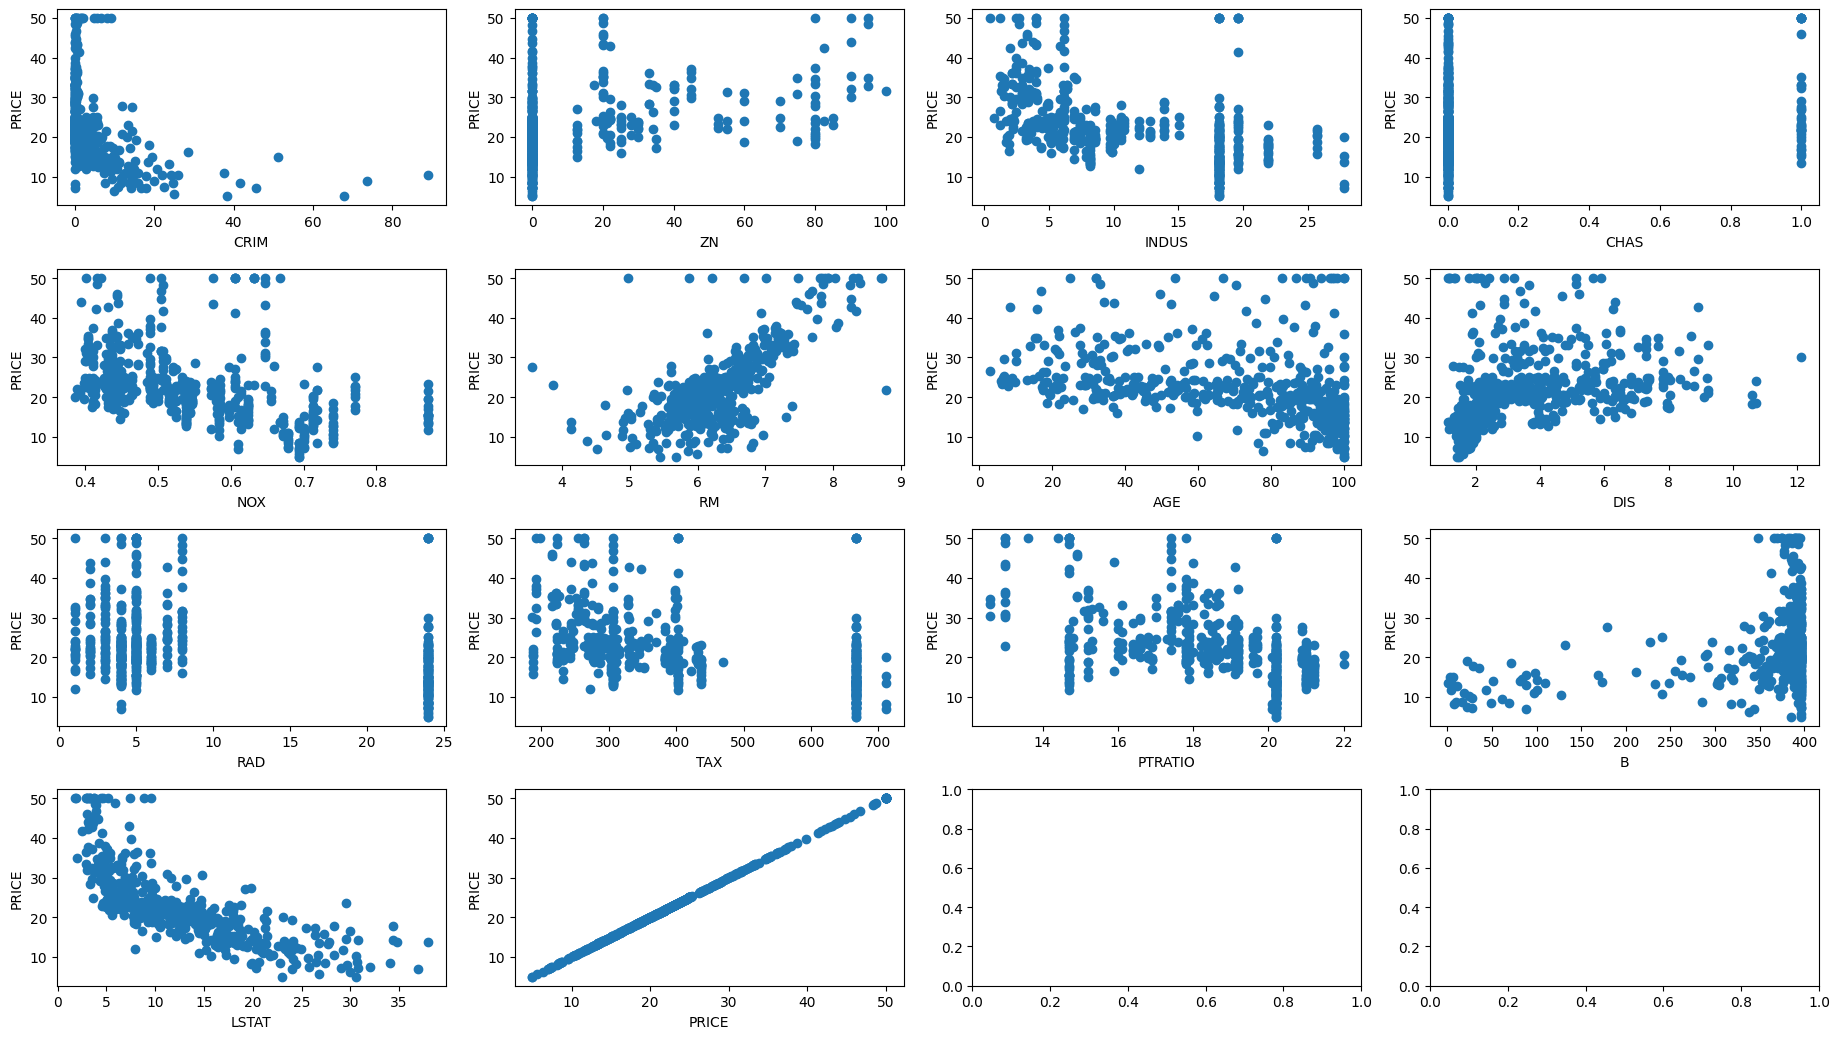

In [37]:
fig, axs = plt.subplots(4,4)
fig.set_size_inches(18.5,10.5)

for ax, feature in zip(fig.axes, df_boston[:0]):
    ax.scatter(df_boston[feature],df_boston.PRICE)
    ax.set_xlabel(feature)
    ax.set_ylabel('PRICE')

fig.tight_layout()

0.6953599470715396


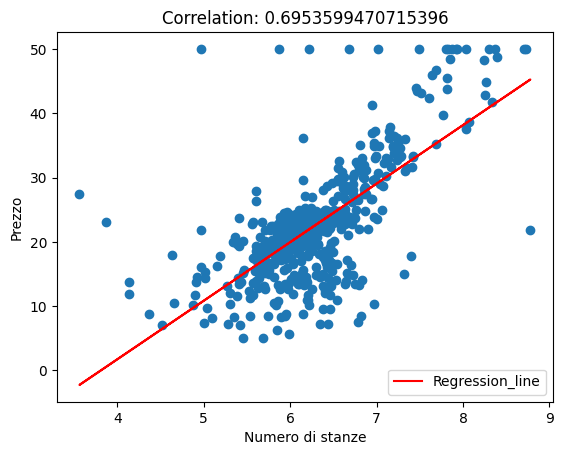

In [38]:
correlation_rm = df_boston['PRICE'].corr(df_boston['RM'])
print(correlation_rm)

fit = np.polyfit(df_boston['RM'], df_boston['PRICE'], 1)
regression_line = np.poly1d(fit)
plt.scatter(df_boston['RM'], df_boston['PRICE'])
plt.plot(df_boston['RM'], regression_line(df_boston['RM']),color = 'red',label = 'Regression_line')
plt.title('Correlation: {}'.format(correlation_rm))
plt.xlabel('Numero di stanze')
plt.ylabel('Prezzo')
plt.legend()

plt.show()


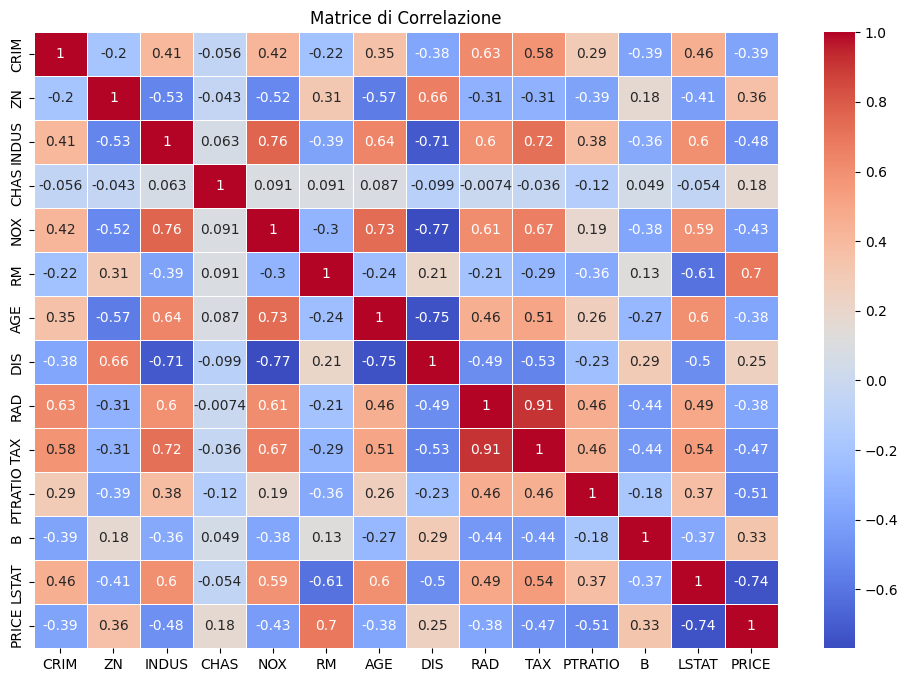

In [39]:
corr_matrix = df_boston.corr()
# Crea un grafico della matrice di correlazione utilizzando seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice di Correlazione')
plt.show()

In [40]:
correlation_chas = df_boston['PRICE'].corr(df_boston['CHAS'])
print(correlation_chas)


0.17526017719029852


In [41]:
y = df_boston['PRICE']
X = df_boston[[i for i in list(df_boston.columns) if i != 'PRICE']]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.21, random_state=46)


model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(model)
print("R2 score: ", r2)#CORRELAZIONE TRA Y TEST E Y PRED
print("MAE: ", mae) #MEAN ABSOLUT ERROR 
print("MSE: ", mse) #MEAN SQUARED ERROR
print("")

LinearRegression()
R2 score:  0.799303639766017
MAE:  2.9250185815009764
MSE:  13.764308216571612



In [42]:
# models = [LinearRegression(),

#             DecisionTreeRegressor(random_state = 42),

#             SGDRegressor(random_state = 42),

#             SVR(),

#             #LogisticRegression(random_state = 42),

#             BayesianRidge(),

#             Ridge(random_state = 42),

#             Lasso(random_state = 42),

#             AdaBoostRegressor(random_state = 42),

#             RandomForestRegressor(random_state= 42)
#              ]

 

# for model in models:

#     model.fit(X_train, y_train)

#     y_pred = model.predict(X_test)

#     r2 = r2_score(y_test, y_pred)

#     mae = mean_absolute_error(y_test, y_pred)

#     print(model)

#     print("R2 score: ", r2)
#     print("MSE: ", mse)
#     print("MAE: ", mae)

#     print("")

In [43]:
corr = pd.DataFrame()
corr['features'] = X.columns
corr['estimatedCoefficient'] = model.coef_
corr

,features,estimatedCoefficient
0,CRIM,-0.122512
1,ZN,0.048983
2,INDUS,0.034721
3,CHAS,2.530370
4,NOX,-18.657500
5,RM,3.820940
6,AGE,-0.004714
7,DIS,-1.615285
8,RAD,0.296581
9,TAX,-0.011540


In [44]:
model.coef_

array([-1.22511566e-01,  4.89828030e-02,  3.47214903e-02,  2.53036996e+00,
       -1.86575001e+01,  3.82094020e+00, -4.71398079e-03, -1.61528476e+00,
        2.96580690e-01, -1.15400295e-02, -9.31887080e-01,  8.00648763e-03,
       -5.15425110e-01])

In [45]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

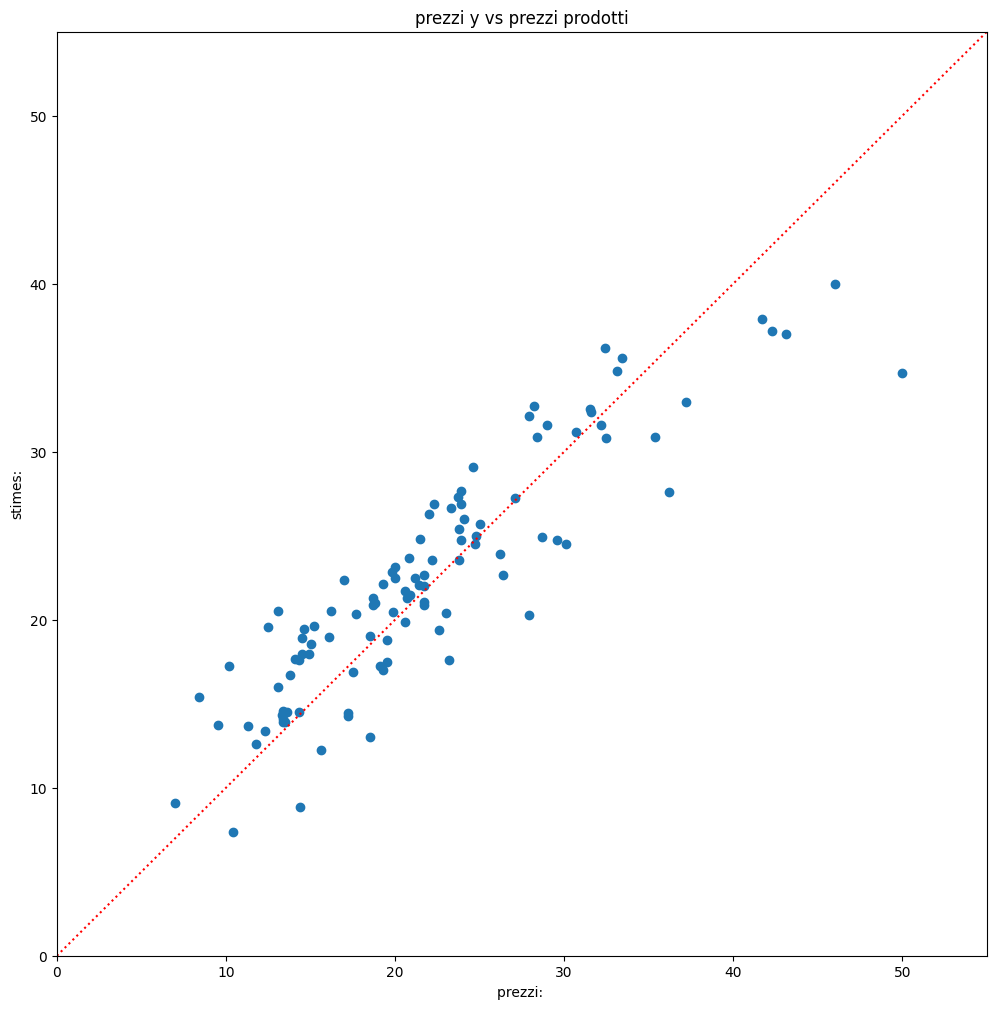

In [47]:
plt.figure(figsize=(12,12))
plt.scatter(y_test, y_pred)
plt.xlabel('prezzi: ')
plt.xlim(0,55)
plt.ylabel('stimes:')
plt.ylim(0,55)
plt.title('prezzi y vs prezzi prodotti')
plt.plot([0,60],[0,60],'r:')
plt.show()